In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from numpy import array
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(data_to_load['Mall_Customers.csv']))

In [ ]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [ ]:
data_new = pd.DataFrame(data, columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'])

In [ ]:
data_new['spend'] = data_new['Annual Income (k$)']*10*data_new['Spending Score (1-100)']
data_new.head()

Age  Annual Income (k$)  Spending Score (1-100)  Gender  spend
0   19                  15                      39    Male   5850
1   21                  15                      81    Male  12150
2   20                  16                       6  Female    960
3   23                  16                      77  Female  12320
4   31                  17                      40  Female   6800

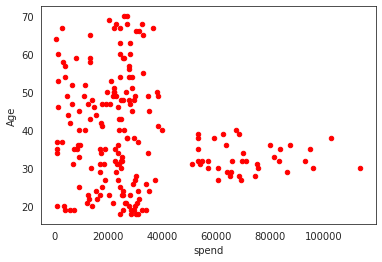

In [ ]:
ax1 = data_new.plot(kind='scatter', x='spend', y='Age', color='r')

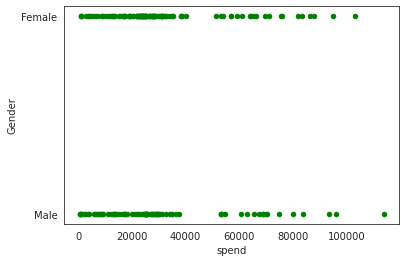

In [ ]:
ax2 = data_new.plot(kind='scatter', x='spend', y='Gender', color='g')

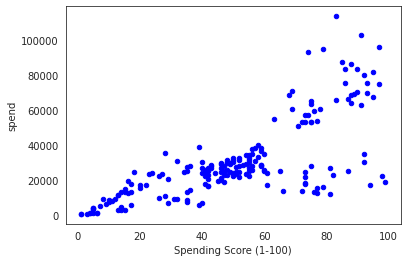

In [ ]:
ax3 = data_new.plot(kind='scatter', x='Spending Score (1-100)', y='spend', color='b')

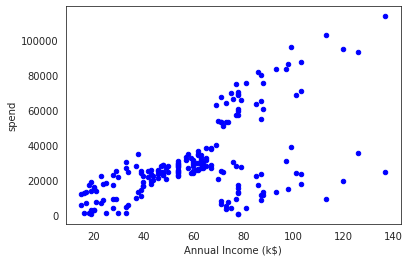

In [ ]:
ax4 = data_new.plot(kind='scatter', x='Annual Income (k$)', y='spend', color='b')

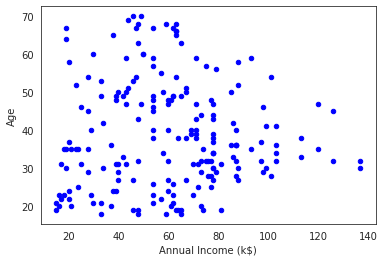

In [ ]:
ax4 = data_new.plot(kind='scatter', x='Annual Income (k$)', y='Age', color='b')

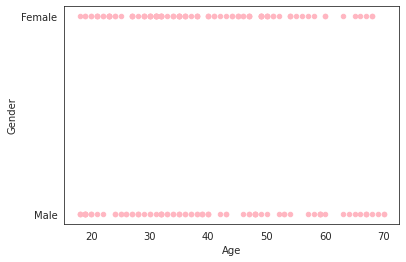

In [ ]:
ax6 = data_new.plot(kind='scatter', x='Age', y='Gender', color='#FFB6C1')

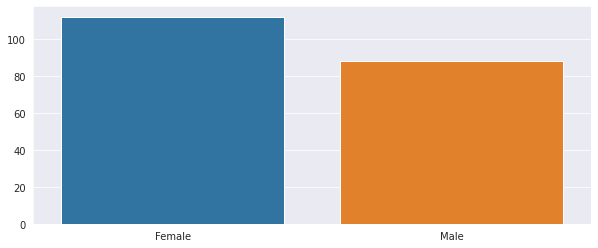

In [ ]:
genders = data.Gender.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

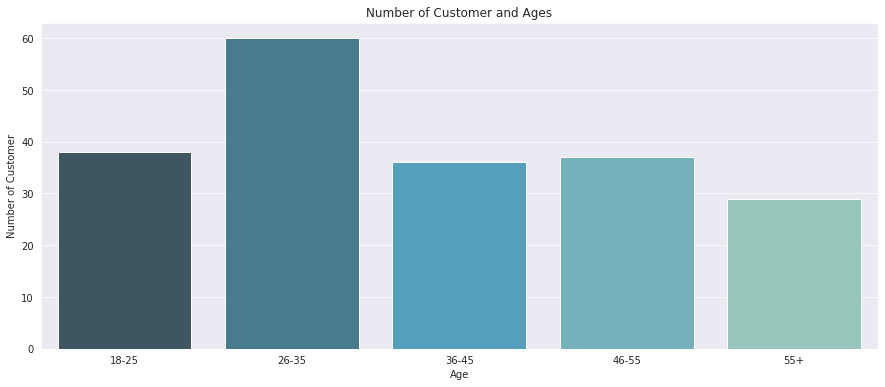

In [ ]:
df=data
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

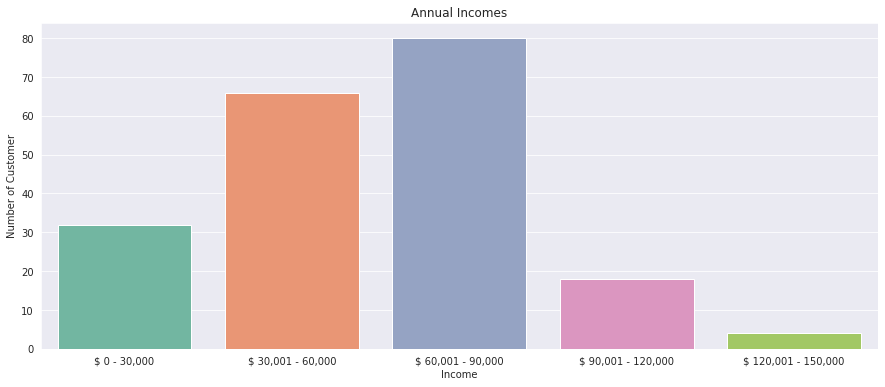

In [ ]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

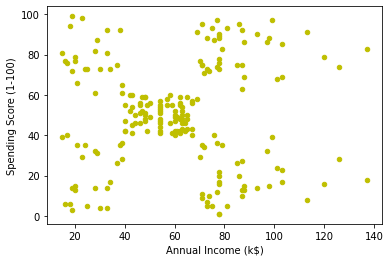

In [ ]:
ax5 = data_new.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', color='y')

In [ ]:
data['income'] = data['Annual Income (k$)'].values*1000
sample_dataset = data[['Age', 'income' , 'Spending Score (1-100)']].copy()

In [ ]:
sample_dataset.rename(columns = {'Spending Score (1-100)':'spend_score'}, inplace = True)
sample_dataset_add = sample_dataset[['Age', 'income' , 'spend_score']].copy()
sample_dataset_add['spend'] = sample_dataset['spend_score']*sample_dataset['income']*0.01

sample_dataset.head()

Age  income  spend_score
0   19   15000           39
1   21   15000           81
2   20   16000            6
3   23   16000           77
4   31   17000           40

In [ ]:
ds_norm = preprocessing.MinMaxScaler().fit_transform(sample_dataset)

In [ ]:
ds_norm

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

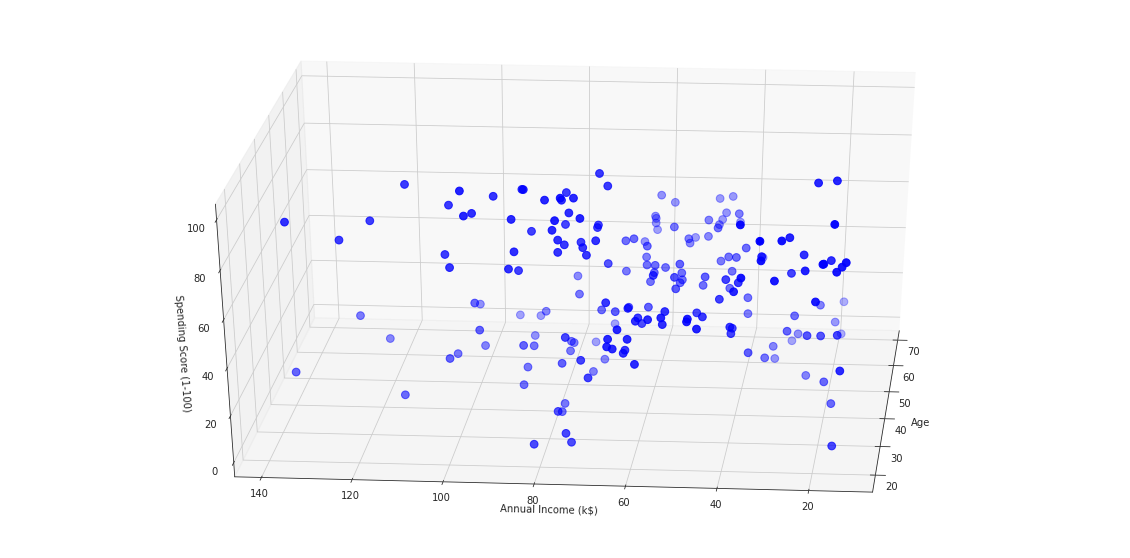

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(ds_norm)
    distortions.append(km.inertia_)

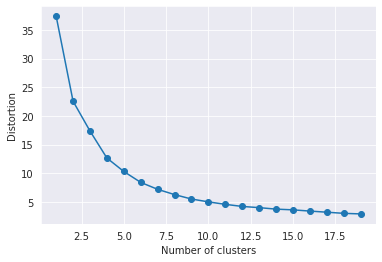

In [ ]:
# plot
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

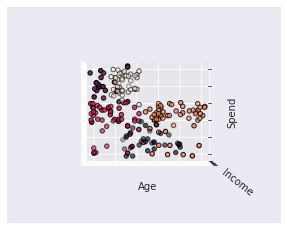

In [ ]:
km = KMeans(
    n_clusters=5, init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)
km.fit(ds_norm)
distortions.append(km.inertia_)


fig = plt.figure(figsize=(4, 3))
labels = km.labels_
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=0, azim=270)
ax.scatter(ds_norm[:, 0]*100, ds_norm[:, 1]*120000, ds_norm[:, 2]*100,c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spend')
ax.dist = 12

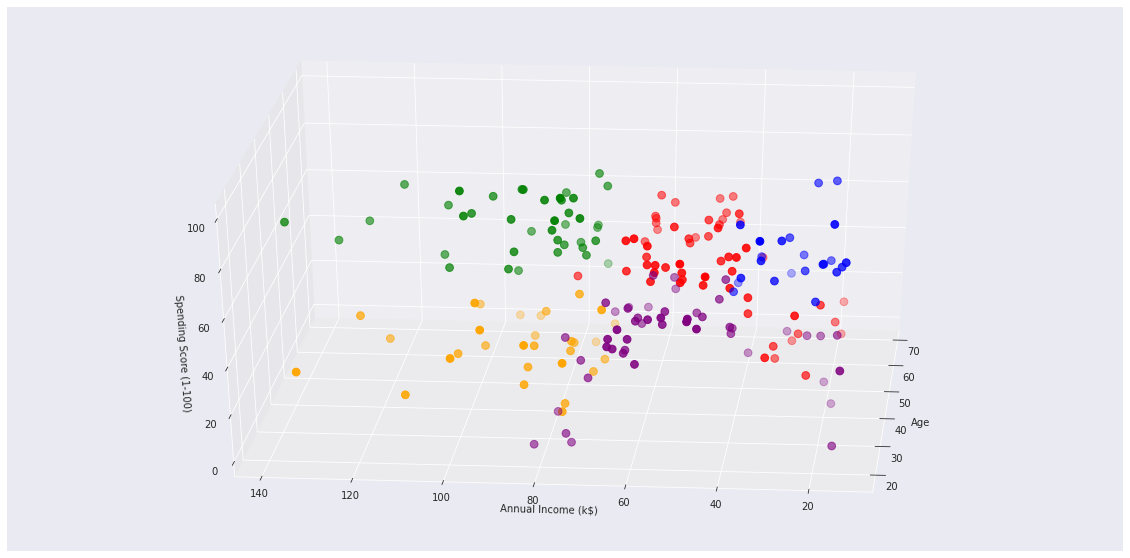

In [ ]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(ds_norm)

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [ ]:
X = preprocessing.MinMaxScaler().fit_transform(sample_dataset_add[['spend', 'Age']])

In [ ]:
distortions_spend = []
for i in range(1, 20):
    km_spend = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km_spend.fit(X)
    distortions_spend.append(km.inertia_)

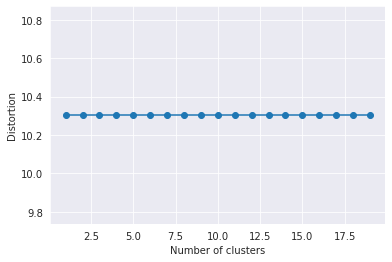

In [ ]:
# plot
plt.plot(range(1, 20), distortions_spend, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()